In [1]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load customer churn dataset
df = pd.read_csv("bukit_vista.csv")
df.head()

,Hotel Name,Price,Property Type,Bedroom,Bathroom,Location
0,Bingin Beach Hideaway: Group Villa with Pool &...,161.0,"Amazing pool, Island life, Pool view, Surfing,...",3,3.0,"Jl. Pantai Cemongkak Gg. Samuh Sari No.2, Peca..."
1,4-Bedroom Mediterranean Luxury Villa with Ubud...,202.0,"Amazing pool, Amazing View, Jungle View, Pool ...",4,4.0,"Jl. Suweta, Ubud, Kecamatan Ubud, Kabupaten Gi..."
2,Luxurious 3-Bedroom Nusa Dua Seafront Villa w/...,357.0,"Beachfront, Villa",3,4.0,Unknown
3,Grand Villa Retreat w/ Pool & Garden in Ungasan,84.0,"Amazing pool, Golfing, Pool view, Villa",2,2.0,"Jl. Pantai Balangan I No.9x, Ungasan, Kec. Kut..."
4,Surfer’s Villa 4 Mins to Bingin & Dreamland Be...,118.0,"Pool view, Villa",2,2.5,"Pecatu, Kuta Selatan, Badung, Bali, Nusa Tengg..."


In [3]:
# Renaming the column 'Price' to 'Price per Night (USD)'
df.rename(columns={'Price': 'Price per Night (USD)'}, inplace=True)

In [4]:
df

,Hotel Name,Price per Night (USD),Property Type,Bedroom,Bathroom,Location
0,Bingin Beach Hideaway: Group Villa with Pool &...,161.0,"Amazing pool, Island life, Pool view, Surfing,...",3,3.0,"Jl. Pantai Cemongkak Gg. Samuh Sari No.2, Peca..."
1,4-Bedroom Mediterranean Luxury Villa with Ubud...,202.0,"Amazing pool, Amazing View, Jungle View, Pool ...",4,4.0,"Jl. Suweta, Ubud, Kecamatan Ubud, Kabupaten Gi..."
2,Luxurious 3-Bedroom Nusa Dua Seafront Villa w/...,357.0,"Beachfront, Villa",3,4.0,Unknown
3,Grand Villa Retreat w/ Pool & Garden in Ungasan,84.0,"Amazing pool, Golfing, Pool view, Villa",2,2.0,"Jl. Pantai Balangan I No.9x, Ungasan, Kec. Kut..."
4,Surfer’s Villa 4 Mins to Bingin & Dreamland Be...,118.0,"Pool view, Villa",2,2.5,"Pecatu, Kuta Selatan, Badung, Bali, Nusa Tengg..."
5,Private Pool Villa Minutes from Bingin Surf Ha...,165.0,"Pool view, Villa",2,2.0,"Pecatu, Kuta Selatan, Badung, Bali, Nusa Tengg..."
6,Ungasan Exquisite Villa w/ Rooftop & Private P...,167.0,"Amazing pool, Golfing, Surfing, Tropical, Villa",3,3.5,"Ungasan, Kuta Selatan, Badung, Bali, Nusa Teng..."
7,Sun-Soaked Canggu Villa Perfect for Families,100.0,Villa,2,2.0,"Tibubeneng, Kuta Utara, Badung, Bali, Nusa Ten..."
8,Sunny Exquisite Umalas Villa: 20 Minutes to Ca...,108.0,"Guest House, Villa",2,2.0,Unknown
9,Ubud’s Verdant Hideaway w/ Pool & Garden Views,34.0,Guest House,1,1.0,Unknown


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Hotel Name             50 non-null     object 
 1   Price per Night (USD)  48 non-null     float64
 2   Property Type          50 non-null     object 
 3   Bedroom                50 non-null     int64  
 4   Bathroom               49 non-null     float64
 5   Location               50 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 2.5+ KB


In [6]:
# Replace the missing values
df.loc[46, 'Bathroom'] = 1.0


In [7]:

df.loc[22, 'Location'] = 'Canggu, Bali'
df.loc[19, 'Location'] = 'Ungasan, Badung, Bali'
df.loc[18, 'Location'] = 'Ungasan, Badung, Bali'
df.loc[17, 'Location'] = 'Nusa Lembongan, Bali'
df.loc[16, 'Location'] = 'Nusa Lembongan, Bali'
df.loc[15, 'Location'] = 'Nusa Lembongan, Bali'
df.loc[14, 'Location'] = 'Nusa Lembongan, Bali'
df.loc[10, 'Location'] = 'Bingin, Badung, Bali'
df.loc[9, 'Location'] = 'Ubud, Bali'
df.loc[8, 'Location'] = 'Canggu, Bali'
df.loc[2, 'Location'] = 'Nusa Dua, Bali'

In [8]:
df.loc[46, 'Price per Night (USD)'] = 26.0
df.loc[44, 'Price per Night (USD)'] = 86.0

In [9]:
df

,Hotel Name,Price per Night (USD),Property Type,Bedroom,Bathroom,Location
0,Bingin Beach Hideaway: Group Villa with Pool &...,161.0,"Amazing pool, Island life, Pool view, Surfing,...",3,3.0,"Jl. Pantai Cemongkak Gg. Samuh Sari No.2, Peca..."
1,4-Bedroom Mediterranean Luxury Villa with Ubud...,202.0,"Amazing pool, Amazing View, Jungle View, Pool ...",4,4.0,"Jl. Suweta, Ubud, Kecamatan Ubud, Kabupaten Gi..."
2,Luxurious 3-Bedroom Nusa Dua Seafront Villa w/...,357.0,"Beachfront, Villa",3,4.0,"Nusa Dua, Bali"
3,Grand Villa Retreat w/ Pool & Garden in Ungasan,84.0,"Amazing pool, Golfing, Pool view, Villa",2,2.0,"Jl. Pantai Balangan I No.9x, Ungasan, Kec. Kut..."
4,Surfer’s Villa 4 Mins to Bingin & Dreamland Be...,118.0,"Pool view, Villa",2,2.5,"Pecatu, Kuta Selatan, Badung, Bali, Nusa Tengg..."
5,Private Pool Villa Minutes from Bingin Surf Ha...,165.0,"Pool view, Villa",2,2.0,"Pecatu, Kuta Selatan, Badung, Bali, Nusa Tengg..."
6,Ungasan Exquisite Villa w/ Rooftop & Private P...,167.0,"Amazing pool, Golfing, Surfing, Tropical, Villa",3,3.5,"Ungasan, Kuta Selatan, Badung, Bali, Nusa Teng..."
7,Sun-Soaked Canggu Villa Perfect for Families,100.0,Villa,2,2.0,"Tibubeneng, Kuta Utara, Badung, Bali, Nusa Ten..."
8,Sunny Exquisite Umalas Villa: 20 Minutes to Ca...,108.0,"Guest House, Villa",2,2.0,"Canggu, Bali"
9,Ubud’s Verdant Hideaway w/ Pool & Garden Views,34.0,Guest House,1,1.0,"Ubud, Bali"


In [10]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


In [11]:
import streamlit as st
# Streamlit App
st.title("Hotel Popularity Index")
st.sidebar.header("Customize Weights")

2025-03-16 08:34:07.062 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 08:34:07.252 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-16 08:34:07.253 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 08:34:07.255 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 08:34:07.256 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical features
scaler = MinMaxScaler()
df[["Price per Night (USD)", "Bedroom", "Bathroom"]] = scaler.fit_transform(
    df[["Price per Night (USD)", "Bedroom", "Bathroom"]]
)

In [13]:
# Assign weights
# Customize weights
weights = {
    "Price per Night (USD)": st.sidebar.slider("Weight for Price", 0.0, 1.0, 0.3),
    "Bedrooms": st.sidebar.slider("Weight for Bedrooms", 0.0, 1.0, 0.2),
    "Bathrooms": st.sidebar.slider("Weight for Bathrooms", 0.0, 1.0, 0.15),
}

2025-03-16 08:34:19.063 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 08:34:19.064 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 08:34:19.065 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 08:34:19.066 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 08:34:19.067 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 08:34:19.068 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 08:34:19.068 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 08:34:19.069 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [14]:
# Ensure the weights sum to 1
total_weight = sum(weights.values())
if total_weight > 1.0:
    st.sidebar.error("Total weight should not exceed 1.0!")


In [16]:
# Calculate the popularity index
df["Popularity Index"] = (
    df["Price per Night (USD)"] * weights["Price per Night (USD)"] +
    df["Bedroom"] * weights["Bedrooms"] +
    df["Bathroom"] * weights["Bathrooms"]
)


In [17]:
# Rank the hotels
df["Rank"] = df["Popularity Index"].rank(ascending=False).astype(int)

In [18]:
# Sort by popularity index
df = df.sort_values(by="Popularity Index", ascending=False)

In [19]:
df

,Hotel Name,Price per Night (USD),Property Type,Bedroom,Bathroom,Location,Popularity Index,Rank
2,Luxurious 3-Bedroom Nusa Dua Seafront Villa w/...,1.000000,"Beachfront, Villa",0.50,0.750,"Nusa Dua, Bali",0.512500,1
47,Family Holiday House w/ Private Pool in Jimbaran,0.277286,Villa,1.00,1.000,"Alang Alang Residence Jimbaran, Jimbaran (Bali...",0.433186,2
1,4-Bedroom Mediterranean Luxury Villa with Ubud...,0.542773,"Amazing pool, Amazing View, Jungle View, Pool ...",0.75,0.750,"Jl. Suweta, Ubud, Kecamatan Ubud, Kabupaten Gi...",0.425332,3
48,4BR Homey Villa in Uluwatu | Kitchen + Wifi + ...,0.430678,Villa,0.75,0.750,"Jln Labuhan Sait Br. Dinas Kulat, Pecatu Uluwa...",0.391704,4
38,Bohemian Beachfront Surf Villa by the Bingin B...,0.495575,"Beachfront, Residential, Villa",0.75,0.500,"Jl. Pantai Bingin, Pecatu, Kec. Kuta Sel., Kab...",0.373673,5
6,Ungasan Exquisite Villa w/ Rooftop & Private P...,0.439528,"Amazing pool, Golfing, Surfing, Tropical, Villa",0.50,0.625,"Ungasan, Kuta Selatan, Badung, Bali, Nusa Teng...",0.325608,6
30,Bukit Vista | Heritage Joglo Villa w/ Private ...,0.292035,Villa,0.75,0.500,"gupasan, Kec. Gondomanan, Kota Yogyakarta, Dae...",0.312611,7
0,Bingin Beach Hideaway: Group Villa with Pool &...,0.421829,"Amazing pool, Island life, Pool view, Surfing,...",0.50,0.500,"Jl. Pantai Cemongkak Gg. Samuh Sari No.2, Peca...",0.301549,8
39,Bukit Vista | Heritage Joglo Villa w/ Private ...,0.241888,"Residential, Style, Villa",0.75,0.500,"Kauman, Yogyakarta",0.297566,9
40,Bukit Vista | Stunning 3BR Villa Near Padang B...,0.398230,Villa,0.50,0.500,"Pecatu, South Kuta, Badung Regency, Bali 80361...",0.294469,10


In [20]:
# Display the DataFrame
st.subheader("Top Ranked Hotels")
st.write(df[["Rank", "Hotel Name", "Popularity Index"]])


2025-03-16 08:38:11.293 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 08:38:11.296 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 08:38:11.363 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 08:38:11.364 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


2025-03-16 08:38:18.634 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 08:38:18.636 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 08:38:18.725 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 08:38:19.932 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-16 08:38:19.933 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

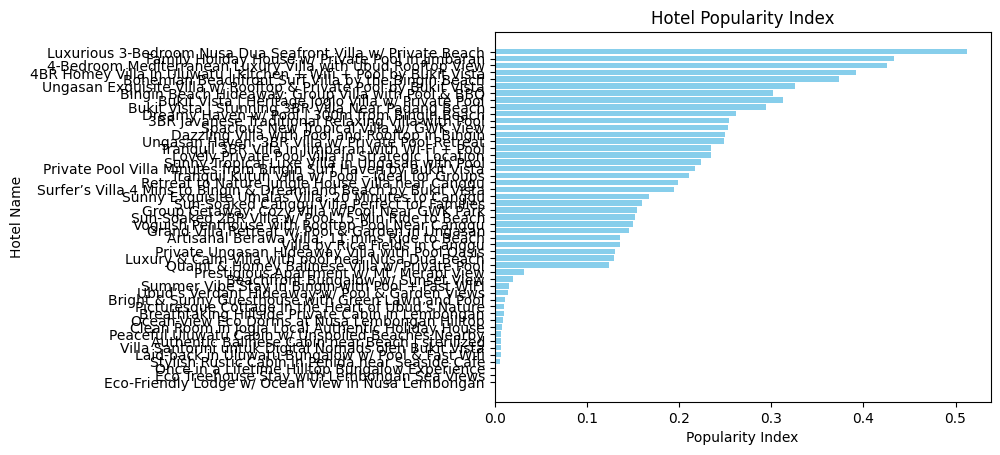

In [21]:
# Plot the Popularity Index
st.subheader("Popularity Index Bar Chart")
fig, ax = plt.subplots()
df_sorted = df.sort_values(by="Popularity Index", ascending=True)
ax.barh(df_sorted["Hotel Name"], df_sorted["Popularity Index"], color="skyblue")
ax.set_xlabel("Popularity Index")
ax.set_ylabel("Hotel Name")
ax.set_title("Hotel Popularity Index")
st.pyplot(fig)